In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [9]:
balance_data = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', sep=',', header=None)
X = balance_data.values[:, 1:5]
Y = balance_data.values[:, 0]
  # Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=100)
#gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
#gini.fit(X_train, y_train)
#entropy = DecisionTreeClassifier( criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
#entropy.fit(X_train, y_train)
#ypred_gini=gini.predict(X_test)
#ypred_entropy=entropy.predict(X_test)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.50622239 0.49377761]


In [13]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [14]:
clf_entropy = DecisionTreeClassifier( criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

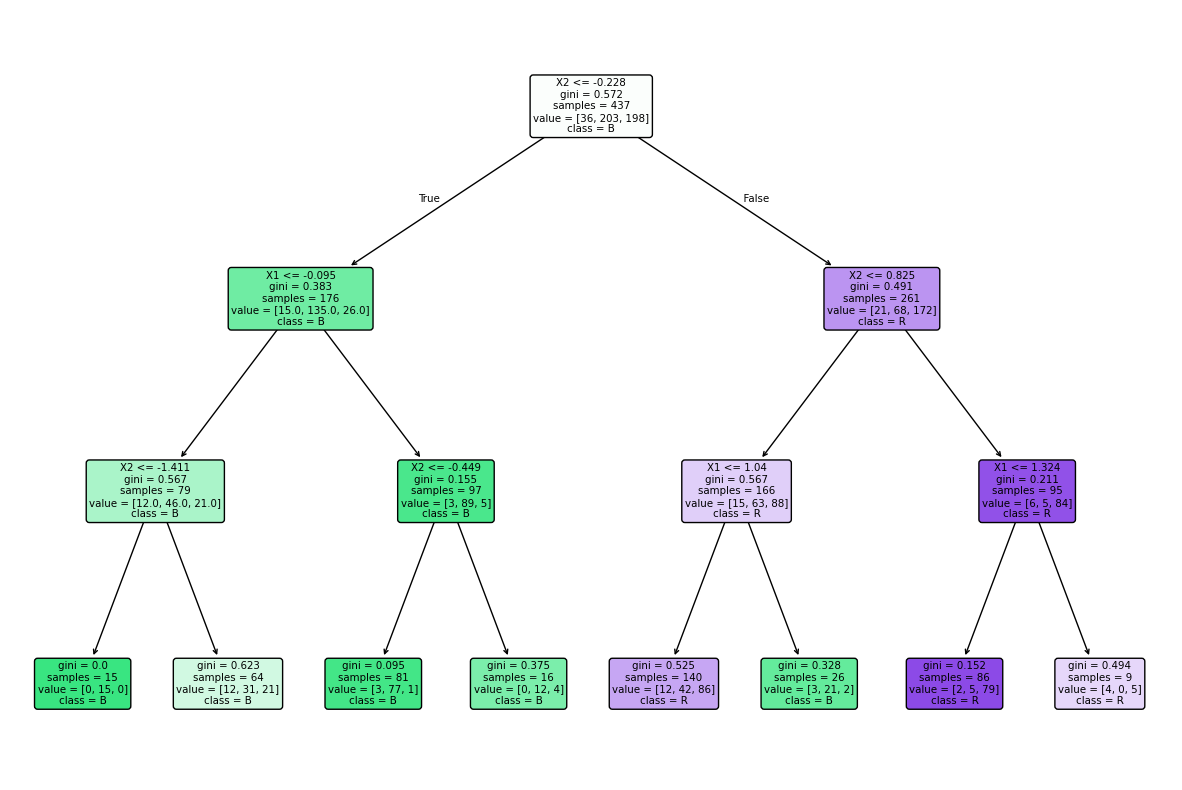

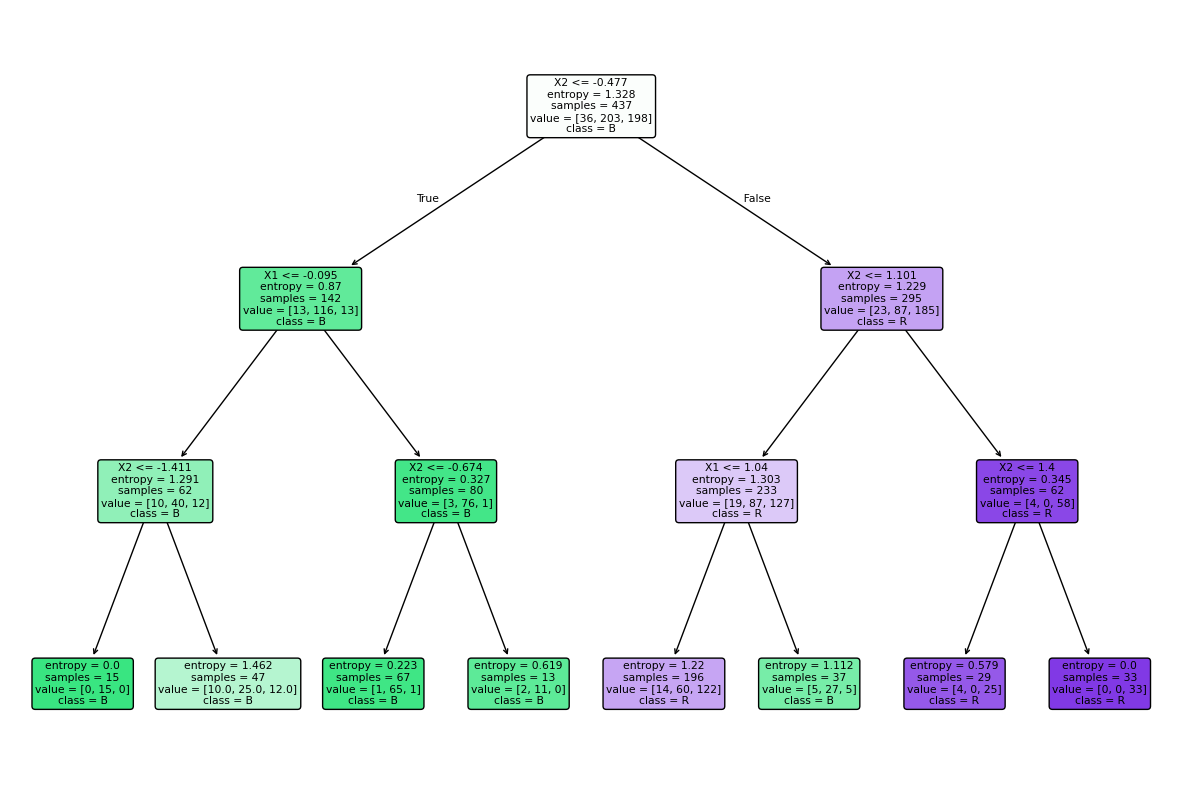

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt # Make sure to import matplotlib

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=['X1', 'X2', 'X3', 'X4'],class_names= ['L', 'B', 'R'], rounded=True) # Call plot_tree from the tree module
plt.show()

from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=['X1', 'X2', 'X3', 'X4'],class_names= ['L', 'B', 'R'], rounded=True)
plt.show()

In [18]:
#accuracy for gini
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))

Predicted values:
['R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R'
 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R']
Confusion Matrix:  [[ 0  8  5]
 [ 0 65 20]
 [ 0 17 73]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
#accuracy for entropy
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))

Predicted values:
['R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R'
 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 60 25]
 [ 0 14 76]]
Accuracy :  72.3404255319149
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
